In [1]:
from scipy.optimize import least_squares
import matplotlib.pyplot as plt
import numpy as np

import json

names = ['0', '1–4', '5–9', '10–14', '15–19', '20–24', '25–29', '30–34', '35–39', '40–44', '45–49', '50–54', '55–59', '60–64', '65–69', '70–74', '75–79', '80–84', '85+']
years = [1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]

with open('data.json') as inp:
    data = json.load(inp)

0.0141421721307 %


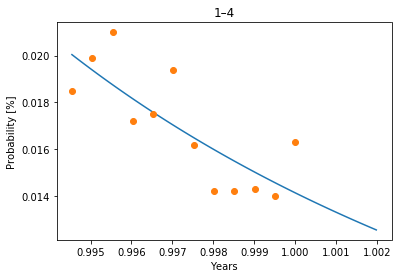

0.00835518695495 %


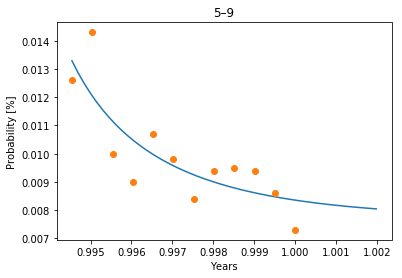

0.00943037335542 %


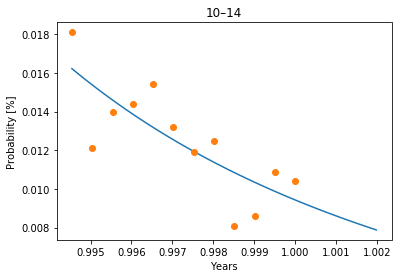

0.0276929911078 %


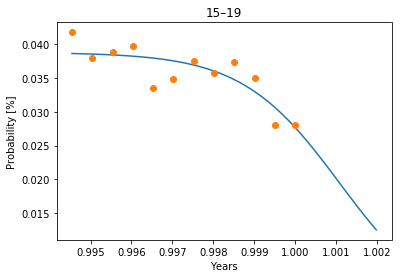

0.045519149092 %


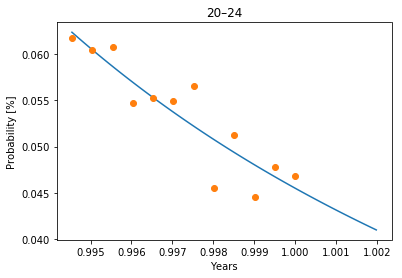

0.0508494011094 %


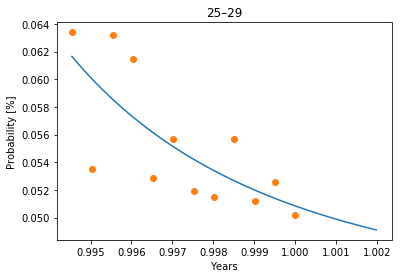

0.0614778222266 %


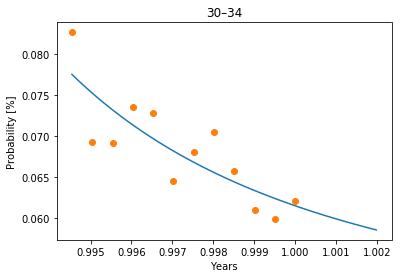

0.0873578418162 %


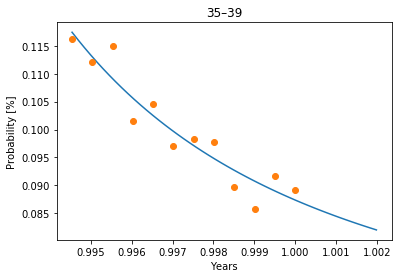

0.132691179851 %


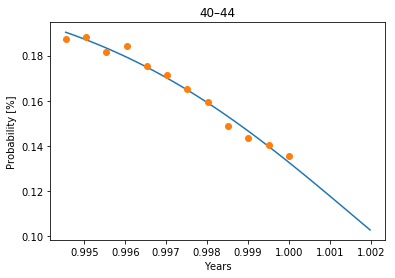

0.245936339536 %


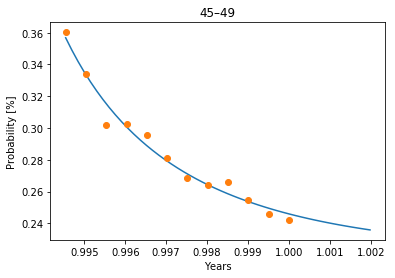

0.375846165259 %


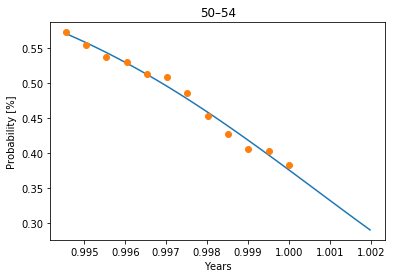

0.654354817777 %


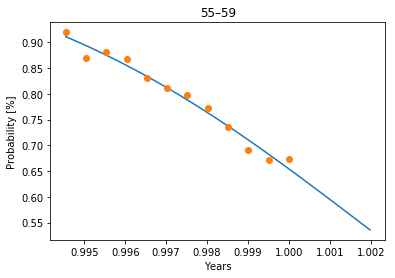

1.09174375896 %


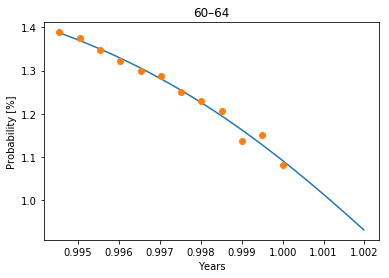

1.74457951092 %


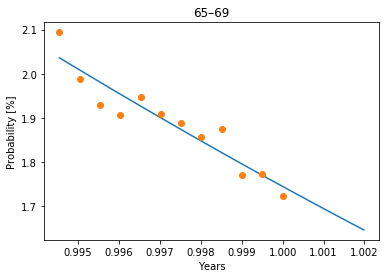

2.67007484881 %


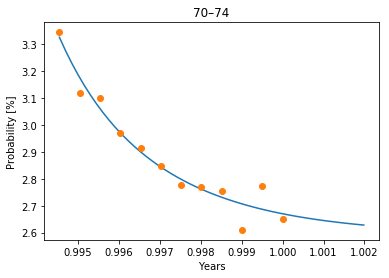

4.18153229188 %


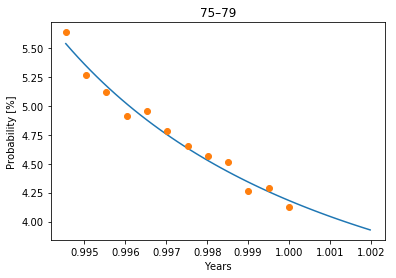

7.47449406075 %


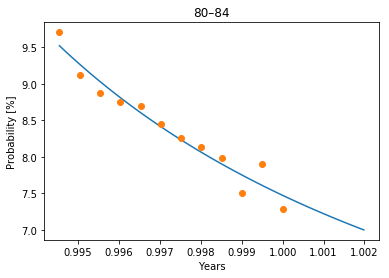

16.6883921084 %


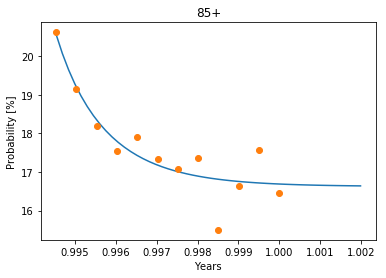

In [2]:
def model(val, x):
    return  val[1]/(x**val[2] + val[3])
   # return val[0] * (x ** 2 + val[1] * x) / (x ** 2 + val[2] * x + val[3])

def func(val, x, y):
    return model(val, x) - y

celkovo = 1
amp = []

for part, name in zip(data, names):
    if name == '0':
        continue
    y_o = np.array(part[-12:])
    x_o = np.array(years[-12:])

    y = y_o / 10**3
    x = x_o / x_o.max()


    x0 = np.array([1,1, 1 , 1])

    res = least_squares(func, x0, args=(x, y))
    xnew = np.linspace(x.min(), 2020/x_o.max(), 50)

    celkovo *= model(res.x, 2016/x_o.max())
    amp.append(model(res.x, 2016/x_o.max()))
    print(model(res.x, 2016/x_o.max()), '%')
    plt.xlabel('Years')
    plt.ylabel('Probability [%]')
    plt.title(name)
    plt.plot(xnew, model(res.x, xnew), '-', x , y , 'o')
    #plt.ylim(0,0.1)
    plt.show()

In [3]:
print(celkovo, "%")

8.16631736707e-12 %


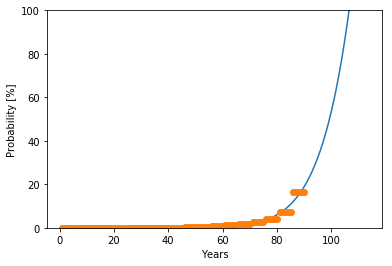

In [4]:
def model(val, x):
    return  val[0] + val[1]*x**val[2]
   # return val[0] * (x ** 2 + val[1] * x) / (x ** 2 + val[2] * x + val[3])

def func(val, x, y):
    return model(val, x) - y

test = []
for i in amp:
    test += [i]*5

y = np.array(test)
x = np.array(range(1,len(test)+1))

x0 = np.array([1,1, 1])

res = least_squares(func, x0, args=(x, y))
xnew = np.linspace(1, 113, 113)
plt.xlabel('Years')
plt.ylabel('Probability [%]')
plt.plot(xnew, model(res.x, xnew), '-', x , y , 'o')
plt.ylim(0,100)
plt.show()

In [5]:
res.x[0]

0.15137494891800024

In [6]:
np.power((100 - res.x[0])/res.x[1], 1/res.x[2])

106.51758517551524